In [1]:
#Import all the necessary packages!

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

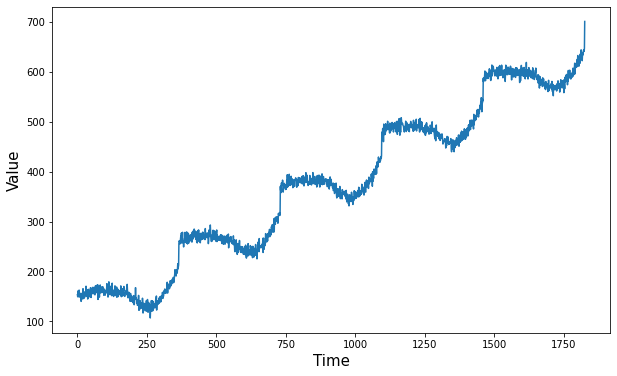

In [2]:
#Create the time series dataset! (An arbitrary one!)

time = np.arange(5 * 365 + 1, dtype = 'float32')
baseline = 100
amplitude = 40
noise_level = 7

def trend(time, slope = 0):
  return time * slope

series = trend(time, slope=0.3)

def series_plot(time, series, start, end):
  plt.plot(time[start:end], series[start:end])
  plt.xlabel('Time', fontsize = 15)
  plt.ylabel('Value', fontsize = 15)
  plt.grid = True

def pattern_seasonal(season_time):
  return np.where(season_time < 0.5, np.cos(np.pi * season_time), np.sin(np.pi * season_time * 2))

def seasonality(time, period, amplitude, phase = 0):
  season_time = ((time + phase) % period) / period
  return amplitude * pattern_seasonal(season_time)

def noise(time, noise_level, seed = None):
  rand = np.random.RandomState(seed= 42)
  return rand.randn(len(time)) * noise_level

# Create the series
series = baseline + trend(time, slope=0.3) + seasonality(time, period=365, amplitude=50)

# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
series_plot(time, series, start=0, end=None)
plt.show()

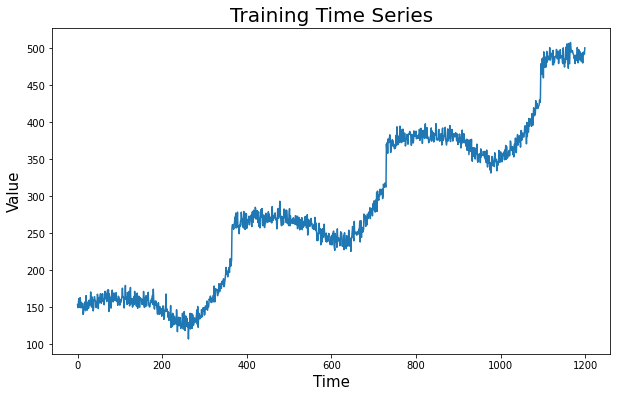

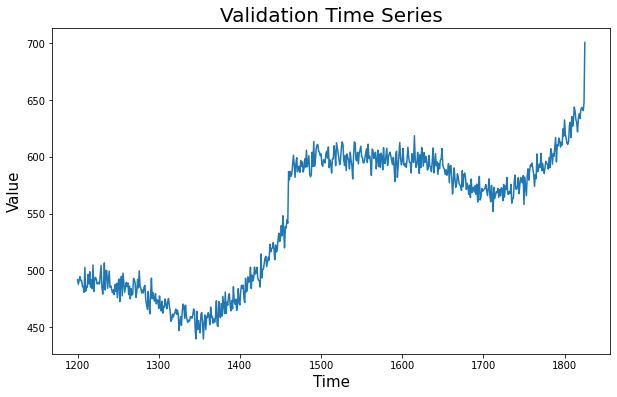

In [7]:
#Split to training and validation

split_time = 1200
time_train = time[:split_time]
X_train = series[:split_time]
time_valid = time[split_time:]
X_valid = series[split_time:]
plt.figure(figsize=(10, 6))
series_plot(time_train, X_train, start=0, end=None)
plt.title('Training Time Series', fontsize = 20)
plt.show()

plt.figure(figsize=(10, 6))
series_plot(time_valid, X_valid, start=0, end=None)
plt.title('Validation Time Series', fontsize = 20)
plt.show()

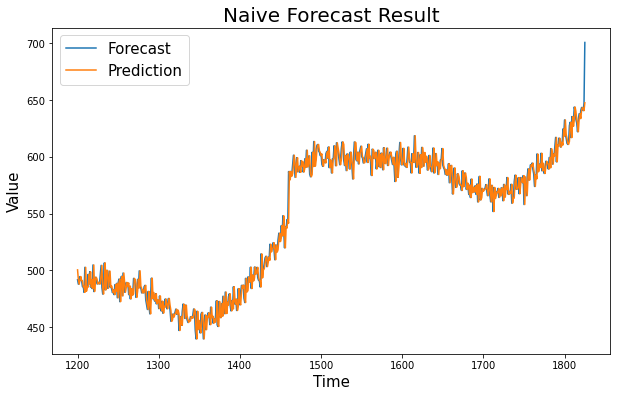

In [4]:
# Naive Forecast

naive_fc = series[split_time - 1:-1]

plt.figure(figsize=(10, 6))
series_plot(time_valid, X_valid, start=0, end=None)
series_plot(time_valid, naive_fc, start=0, end=None)
plt.title('Naive Forecast Result', loc='center', fontsize = 20)
plt.legend(['Forecast', 'Prediction'], loc='upper left', prop={'size': 15})
plt.show()

In [19]:
# Compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period!

print('Mean Squared Error (Naive Forecast): {}'.format(keras.metrics.mean_squared_error(X_valid, naive_fc).numpy()))
print('Mean Absolute Error (Naive Forecast): {}'.format(keras.metrics.mean_absolute_error(X_valid, naive_fc).numpy()))

Mean Squared Error (Naive Forecast): 101.60730743408203
Mean Absolute Error (Naive Forecast): 8.01507568359375


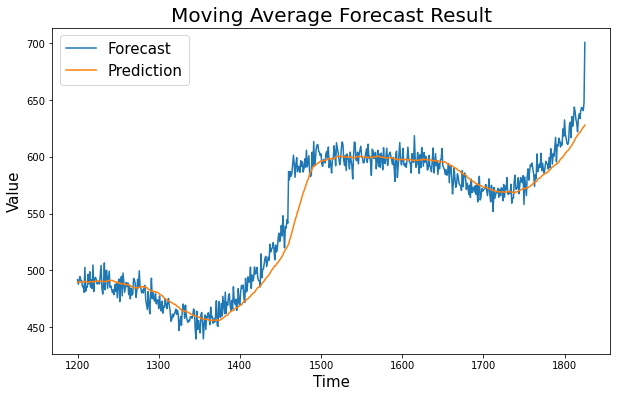

In [16]:
# Moving Average

def movingaverage_fc(series, window_size):
  list_forecast = []
  for i in range(len(series) - window_size):
    list_forecast.append(series[i : i + window_size].mean())
  return np.array(list_forecast)

movingaverage = movingaverage_fc(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
series_plot(time_valid, X_valid, start=0, end=None)
series_plot(time_valid, ma, start=0, end=None)
plt.title('Moving Average Forecast Result', loc='center', fontsize = 20)
plt.legend(['Forecast', 'Prediction'], loc='upper left', prop={'size': 15})
plt.show()

In [17]:
# Compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period!

print('Mean Squared Error (Moving Average): {}'.format(keras.metrics.mean_squared_error(X_valid, movingaverage).numpy()))
print('Mean Absolute Error (Moving Average): {}'.format(keras.metrics.mean_absolute_error(X_valid, movingaverage).numpy()))

Mean Squared Error (Moving Average): 178.68788146972656
Mean Absolute Error (Moving Average): 9.45940113067627


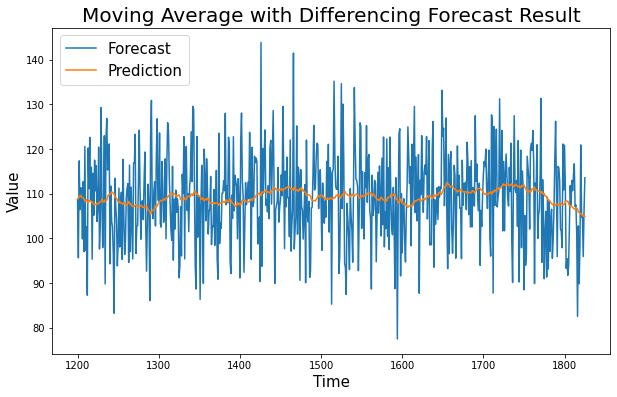

In [11]:
# Moving Average with differencing.

series_diff = (series[365:] - series[:-365])
time_diff = time[365:]
movingaverage_diff = movingaverage_fc(series_diff, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
series_plot(time_valid, series_diff[split_time - 365:], start=0, end=None)
series_plot(time_valid, movingaverage_diff, start=0, end=None)
plt.title('Moving Average with Differencing Forecast Result', loc='center', fontsize = 20)
plt.legend(['Forecast', 'Prediction'], loc='upper left', prop={'size': 15})
plt.show()

In [15]:
# Compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period!

print('Mean Squared Error (Moving Average with differencing): {}'.format(keras.metrics.mean_squared_error(X_valid, movingaverage_diff).numpy()))
print('Mean Absolute Error (Moving Average with differencing): {}'.format(keras.metrics.mean_absolute_error(X_valid, movingaverage_diff).numpy()))

Mean Squared Error (Moving Average with differencing): 194961.046875
Mean Absolute Error (Moving Average with differencing): 437.73931884765625


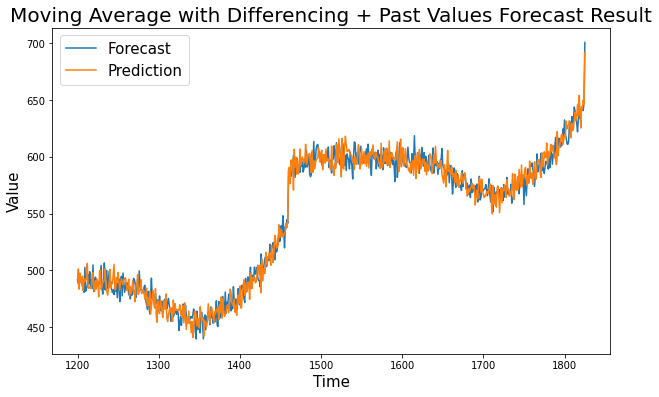

In [14]:
# Moving Average with differencing + past values!

movingaverage_diff_plus_past = series[split_time - 365:-365] + movingaverage_diff

plt.figure(figsize=(10, 6))
series_plot(time_valid, X_valid, start=0, end=None)
series_plot(time_valid, movingaverage_diff_plus_past, start=0, end=None)
plt.title('Moving Average with Differencing + Past Values Forecast Result', loc='center', fontsize = 20)
plt.legend(['Forecast', 'Prediction'], loc='upper left', prop={'size': 15})
plt.show()

In [18]:
# Compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period!

print('Mean Squared Error (Moving Average with differencing + Past Values!): {}'.format(keras.metrics.mean_squared_error(X_valid, movingaverage_diff_plus_past).numpy()))
print('Mean Absolute Error (Moving Average with differencing + Past Values!): {}'.format(keras.metrics.mean_absolute_error(X_valid, movingaverage_diff_plus_past).numpy()))

Mean Squared Error (Moving Average with differencing + Past Values!): 104.16148376464844
Mean Absolute Error (Moving Average with differencing + Past Values!): 8.088420867919922
